# CSE-221710310017-GAJJALA MAANSI

### As an extension of today’s class, try to build the Simple Linear Regression Model by using Boston Dataset.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib

In [3]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
print(matplotlib.__version__)

1.18.1
1.0.1
0.10.0
3.1.3


In [4]:
from sklearn.datasets import load_boston

In [5]:
help(load_boston)

Help on function load_boston in module sklearn.datasets._base:

load_boston(return_X_y=False)
    Load and return the boston house-prices dataset (regression).
    
    ==============   ==============
    Samples total               506
    Dimensionality               13
    Features         real, positive
    Targets           real 5. - 50.
    ==============   ==============
    
    Read more in the :ref:`User Guide <boston_dataset>`.
    
    Parameters
    ----------
    return_X_y : boolean, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : Bunch
        Dictionary-like object, the interesting attributes are:
        'data', the data to learn, 'target', the regression targets,
        'DESCR', the full description of the dataset,
        and 'filename', the physical location of boston
        

In [6]:
bson=load_boston()

In [7]:
bson.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
bson.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
bson.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
print(bson.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
df=pd.DataFrame(bson.data,columns=bson.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [12]:
df['MEDV']=bson.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


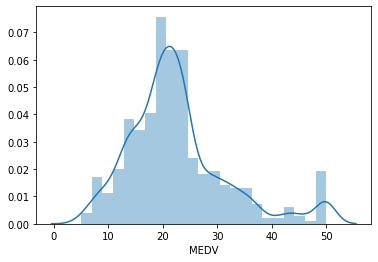

In [15]:
sns.distplot(df.MEDV)

In [16]:
df[df.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [17]:
RM_y=df[['MEDV']]
RM_y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [18]:
RM_x=df[['RM']]
RM_x

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [19]:
from sklearn.model_selection import train_test_split
RM_x_train,RM_x_test,RM_y_train,RM_y_test=train_test_split(RM_x,RM_y,test_size=0.2,random_state=2)

In [20]:
print(RM_x_train.shape)
print(RM_y_train.shape)
print(RM_x_test.shape)
print(RM_y_test.shape)

(404, 1)
(404, 1)
(102, 1)
(102, 1)


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
le=LinearRegression()

In [23]:
le.fit(RM_x_train,RM_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
RM_y_pred=le.predict(RM_x_test)

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(RM_y_test,RM_y_pred)

0.633543994842449

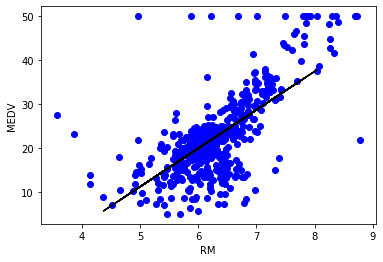

In [27]:
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.scatter(RM_x,RM_y,color="blue")
plt.plot(RM_x_test,RM_y_pred,color="black")
plt.show()

The r2_score Simple Linear Regression of RM and MEDV is 0.6335439948424493 >5
It means RM column shows more effect on MEDV

In [28]:
LSTAT_y=df[['MEDV']]
LSTAT_y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [29]:
LSTAT_x=df[['LSTAT']]
LSTAT_x

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33
...,...
501,9.67
502,9.08
503,5.64
504,6.48


In [30]:
LSTAT_x_train,LSTAT_x_test,LSTAT_y_train,LSTAT_y_test=train_test_split(LSTAT_x,LSTAT_y,test_size=0.2,random_state=2)
print(LSTAT_x_train.shape)
print(LSTAT_y_train.shape)
print(LSTAT_x_test.shape)
print(LSTAT_y_test.shape)

(404, 1)
(404, 1)
(102, 1)
(102, 1)


In [31]:
le.fit(LSTAT_x_train,LSTAT_y_train)
LSTAT_y_pred=le.predict(LSTAT_x_test)
r2_score(LSTAT_y_test,LSTAT_y_pred)

0.6029904192340267

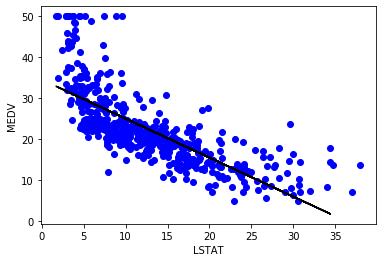

In [32]:
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.scatter(LSTAT_x,LSTAT_y,color="blue")
plt.plot(LSTAT_x_test,LSTAT_y_pred,color="black")
plt.show()

The r2_score Simple Linear Regression of LSTAT and MEDV is 0.6029904192340267 >5
It means LSTAT column shows more effect on MEDV

In [33]:
PTRATIO_y=df[['MEDV']]
PTRATIO_y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [34]:
PTRATIO_x=df[['PTRATIO']]
PTRATIO_x

,PTRATIO
0,15.3
1,17.8
2,17.8
3,18.7
4,18.7
...,...
501,21.0
502,21.0
503,21.0
504,21.0


In [35]:
PTRATIO_x_train,PTRATIO_x_test,PTRATIO_y_train,PTRATIO_y_test=train_test_split(PTRATIO_x,PTRATIO_y,
                                                                               test_size=0.2,random_state=2)

print(PTRATIO_x_train.shape)
print(PTRATIO_y_train.shape)
print(PTRATIO_x_test.shape)
print(PTRATIO_y_test.shape)

(404, 1)
(404, 1)
(102, 1)
(102, 1)


In [36]:
le.fit(PTRATIO_x_train,PTRATIO_y_train)

PTRATIO_y_pred=le.predict(PTRATIO_x_test)

r2_score(PTRATIO_y_test,PTRATIO_y_pred)

0.37344768520359994

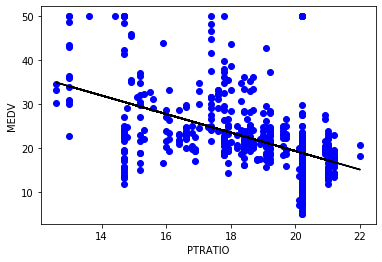

In [37]:
plt.xlabel("PTRATIO")
plt.ylabel("MEDV")
plt.scatter(PTRATIO_x,PTRATIO_y,color="blue")
plt.plot(PTRATIO_x_test,PTRATIO_y_pred,color="black")
plt.show()

The r2_score Simple Linear Regression of PTRATIO and MEDV is 0.37344768520359994 <5
It means PTRATIO column shows less effect on MEDV

In [38]:
AGE_y=df[['MEDV']]
AGE_y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [39]:
AGE_x=df[['AGE']]
AGE_x

,AGE
0,65.2
1,78.9
2,61.1
3,45.8
4,54.2
...,...
501,69.1
502,76.7
503,91.0
504,89.3


In [40]:
AGE_x_train,AGE_x_test,AGE_y_train,AGE_y_test=train_test_split(AGE_x,AGE_y,
                                                                               test_size=0.2,random_state=2)

print(AGE_x_train.shape)
print(AGE_y_train.shape)
print(AGE_x_test.shape)
print(AGE_y_test.shape)

(404, 1)
(404, 1)
(102, 1)
(102, 1)


In [41]:
le.fit(AGE_x_train,AGE_y_train)

AGE_y_pred=le.predict(AGE_x_test)

r2_score(AGE_y_test,AGE_y_pred)

0.2165852194670006

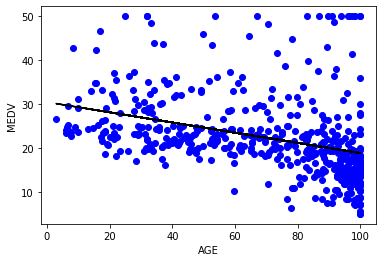

In [42]:
plt.xlabel("AGE")
plt.ylabel("MEDV")
plt.scatter(AGE_x,AGE_y,color="blue")
plt.plot(AGE_x_test,AGE_y_pred,color="black")
plt.show()

The r2_score Simple Linear Regression of AGE and MEDV is 0.2165852194670006 <5

It means AGE column shows less effect on MEDV


RM shows High effect on MEDV

LSTAT shows Mid-High effect on MEDV

PTRATIO shows Mid effect on MEDV

AGE shows Low effect on MEDV